### Pre Processing

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [12]:
df = pd.read_csv('prix_voiture.csv')

In [ ]:
df.columns

In [14]:
df["carburant"].unique()
df["modèle"].nunique()


140

In [ ]:
df

In [ ]:
df.columns

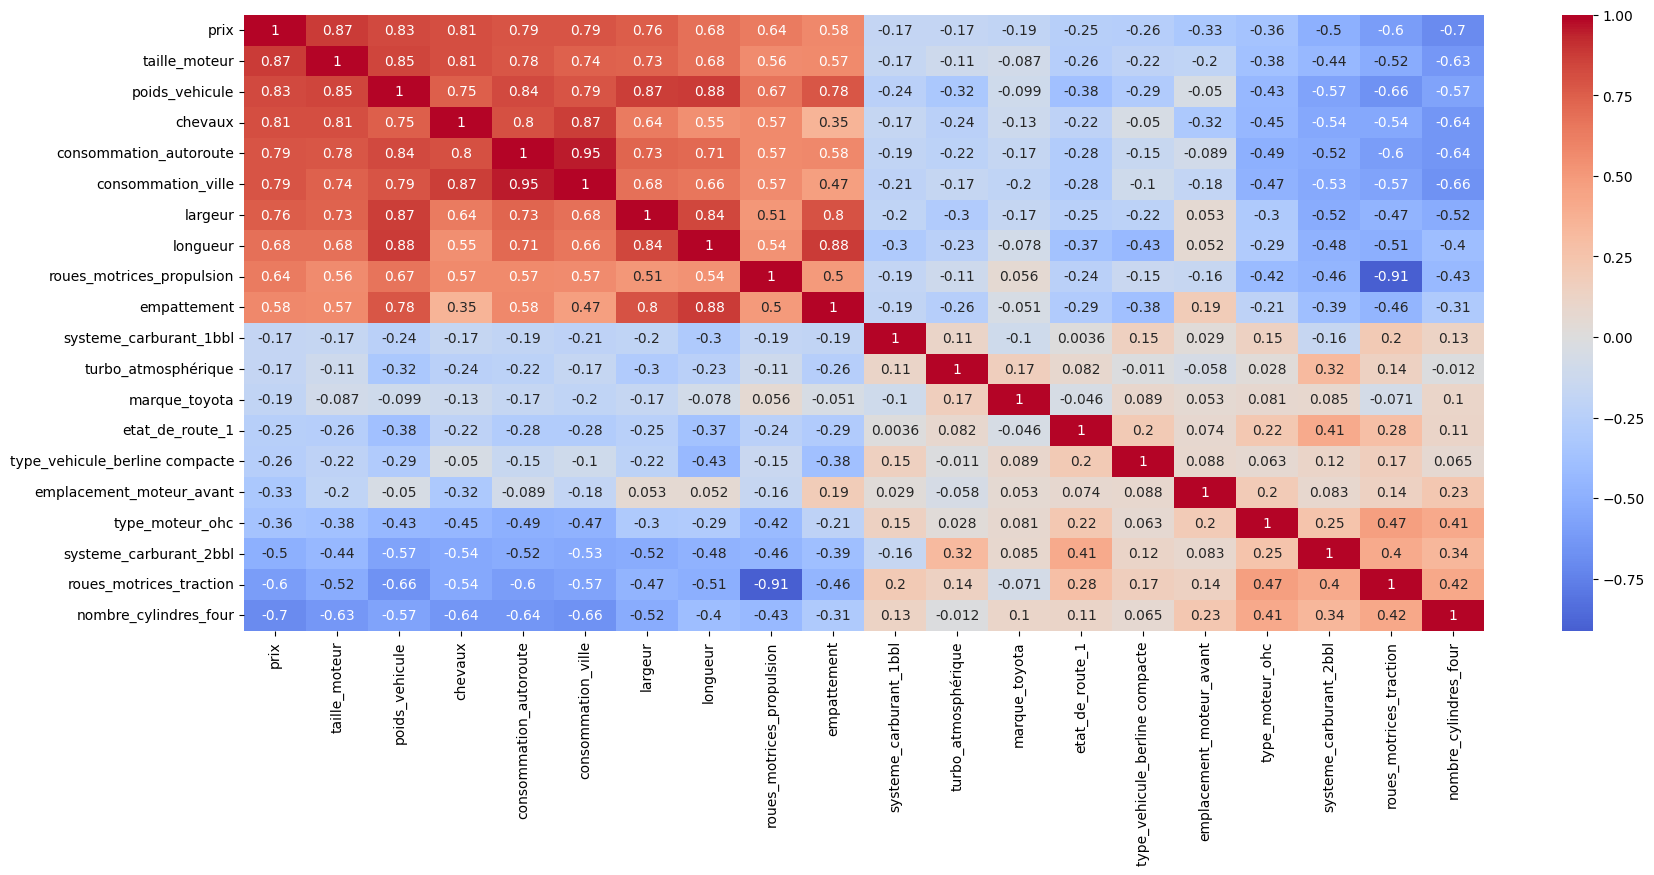

,prix,taille_moteur,poids_vehicule,chevaux,consommation_autoroute,consommation_ville,largeur,longueur,roues_motrices_propulsion,empattement,systeme_carburant_1bbl,turbo_atmosphérique,marque_toyota,etat_de_route_1,type_vehicule_berline compacte,emplacement_moteur_avant,type_moteur_ohc,systeme_carburant_2bbl,roues_motrices_traction,nombre_cylindres_four
prix,1.000000,0.873886,0.833997,0.806986,0.789568,0.786919,0.758250,0.681318,0.636592,0.575295,-0.173805,-0.174673,-0.187733,-0.249777,-0.260396,-0.325238,-0.364678,-0.495697,-0.599021,-0.696820
taille_moteur,0.873886,1.000000,0.850183,0.809006,0.776390,0.744185,0.734644,0.682573,0.563709,0.567752,-0.171081,-0.105805,-0.086530,-0.255759,-0.215179,-0.196486,-0.378198,-0.439523,-0.516244,-0.630342
poids_vehicule,0.833997,0.850183,1.000000,0.749232,0.835595,0.790257,0.866894,0.878048,0.667843,0.776685,-0.236911,-0.322424,-0.098996,-0.384670,-0.286477,-0.049605,-0.434552,-0.572721,-0.663612,-0.574836
chevaux,0.806986,0.809006,0.749232,1.000000,0.800801,0.870354,0.638929,0.550222,0.573304,0.351404,-0.168641,-0.239243,-0.127127,-0.216165,-0.050122,-0.317859,-0.446077,-0.538666,-0.541790,-0.638357
consommation_autoroute,0.789568,0.776390,0.835595,0.800801,1.000000,0.954874,0.727502,0.711305,0.571098,0.577252,-0.191835,-0.222864,-0.167226,-0.277374,-0.154714,-0.089491,-0.494189,-0.520742,-0.598096,-0.640447
consommation_ville,0.786919,0.744185,0.790257,0.870354,0.954874,1.000000,0.681889,0.658227,0.566628,0.472851,-0.211927,-0.170679,-0.196156,-0.281124,-0.104118,-0.183632,-0.474288,-0.531826,-0.573118,-0.660985
largeur,0.758250,0.734644,0.866894,0.638929,0.727502,0.681889,1.000000,0.839916,0.509086,0.795118,-0.196477,-0.298683,-0.167963,-0.245677,-0.217241,0.052733,-0.302339,-0.519750,-0.469561,-0.521979
longueur,0.681318,0.682573,0.878048,0.550222,0.711305,0.658227,0.839916,1.000000,0.536624,0.875704,-0.300701,-0.232309,-0.077658,-0.367272,-0.432058,0.052182,-0.291950,-0.483445,-0.506462,-0.398573
roues_motrices_propulsion,0.636592,0.563709,0.667843,0.573304,0.571098,0.566628,0.509086,0.536624,1.000000,0.496176,-0.185161,-0.109357,0.056416,-0.235348,-0.146822,-0.158322,-0.421602,-0.459191,-0.911458,-0.432264
empattement,0.575295,0.567752,0.776685,0.351404,0.577252,0.472851,0.795118,0.875704,0.496176,1.000000,-0.193298,-0.258744,-0.050873,-0.287421,-0.381979,0.191400,-0.213846,-0.393958,-0.456676,-0.306329


In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, PolynomialFeatures
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer

y = df['prix']
X = df.drop(['prix'], axis=1)
categorial_features = ['etat_de_route', 'carburant','turbo','nombre_portes', 'type_vehicule', 'roues_motrices', 'emplacement_moteur','type_moteur', 'nombre_cylindres', 'systeme_carburant', 'marque', 'modèle']
numeric_features = ['empattement', 'longueur' , 'largeur','hauteur', 'poids_vehicule', 'taille_moteur', 'taux_alésage', 'course', 'taux_compression','chevaux','tour_moteur', 'consommation_ville', 'consommation_autoroute']
categorical_transformer = Pipeline(steps=[
    ('onehotencoder', OneHotEncoder(handle_unknown='ignore'))
])
# define the numeric transformer
numeric_transformer = Pipeline([
        ('min_max', MinMaxScaler()),  #StandardScaler():moyenne 0 et écart type = 1 -> Reg, SVM, PCA
        ('poly', PolynomialFeatures(degree=2, include_bias=False))
        ])


# use the ColumnTransformer to apply the appropriate transformers to each column
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorial_features)
])

# fit and transform the categorical features
X_cat_transformed = categorical_transformer.fit_transform(X[categorial_features])

# create a dataframe from the transformed categorical features
X_cat_transformed_df = pd.DataFrame(X_cat_transformed.toarray(),
                                    columns=categorical_transformer['onehotencoder'].get_feature_names_out(categorial_features))

# concatenate the transformed categorical features and the numeric features
X_transformed = pd.concat([X_cat_transformed_df, X[numeric_features]], axis=1)

# display the transformed dataframe

%matplotlib inline

df_with_prix = pd.concat([y,X_transformed], axis=1)
corr_matrix = df_with_prix.corrwith(df_with_prix['prix']).sort_values(ascending=False)
# select the top 10 most positively correlated variables (excluding the 'prix' column)
top_pos_vars = corr_matrix.head(10).index.tolist()
# select the top 10 most negatively correlated variables (excluding the 'prix' column)
top_neg_vars = corr_matrix.tail(10).index.tolist()
df_top_vars = df_with_prix[ top_pos_vars + top_neg_vars]
# calculate the pairwise correlation matrix of the new dataframe
most_corr_matrix = df_top_vars.corr()
# plot the correlation matrix as a heatmap
fig, ax = plt.subplots(figsize=(20, 8))
sns.heatmap(most_corr_matrix, cmap='coolwarm', center=0, annot=True)
# display the plot
plt.show()
most_corr_matrix



In [ ]:
df.columns

In [27]:
df_top_vars.columns

Index(['prix', 'taille_moteur', 'poids_vehicule', 'chevaux',
       'consommation_autoroute', 'consommation_ville', 'largeur', 'longueur',
       'roues_motrices_propulsion', 'empattement', 'systeme_carburant_1bbl',
       'turbo_atmosphérique', 'marque_toyota', 'etat_de_route_1',
       'type_vehicule_berline compacte', 'emplacement_moteur_avant',
       'type_moteur_ohc', 'systeme_carburant_2bbl', 'roues_motrices_traction',
       'nombre_cylindres_four'],
      dtype='object')

In [20]:
df_top_vars.columns

Index(['prix', 'taille_moteur', 'poids_vehicule', 'chevaux',
       'consommation_autoroute', 'consommation_ville', 'largeur', 'longueur',
       'roues_motrices_propulsion', 'empattement', 'systeme_carburant_1bbl',
       'turbo_atmosphérique', 'marque_toyota', 'etat_de_route_1',
       'type_vehicule_berline compacte', 'emplacement_moteur_avant',
       'type_moteur_ohc', 'systeme_carburant_2bbl', 'roues_motrices_traction',
       'nombre_cylindres_four'],
      dtype='object')

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import FunctionTransformer
from sklearn.ensemble import RandomForestRegressor

# Define X and y variables
y = df_top_vars['prix']
X = df_top_vars.drop(['prix'], axis=1)


categorial_features2 = ['etat_de_route_1','systeme_carburant_2bbl','systeme_carburant_1bbl','turbo_atmosphérique','type_vehicule_berline compacte','roues_motrices_propulsion','roues_motrices_traction', 'emplacement_moteur_avant','type_moteur_ohc','nombre_cylindres_four','systeme_carburant_2bbl', 'marque_toyota'] 
numeric_features2 = ['empattement','longueur' , 'largeur', 'poids_vehicule', 'taille_moteur', 'chevaux','consommation_autoroute', 'consommation_ville',]
# categorial_features = ['etat_de_route', 'carburant','turbo','nombre_portes', 'type_vehicule', 'roues_motrices', 'emplacement_moteur','type_moteur', 'nombre_cylindres', 'systeme_carburant', 'marque', 'modèle']
# numeric_features = ['empattement', 'longueur' , 'largeur','hauteur', 'poids_vehicule', 'taille_moteur', 'taux_alésage', 'course', 'taux_compression','chevaux','tour_moteur', 'consommation_ville', 'consommation_autoroute']
categorical_transformer = Pipeline(steps=[
    ('onehotencoder', OneHotEncoder(handle_unknown='ignore'))
])
# define the numeric transformer
numeric_transformer = Pipeline([
        ('min_max', MinMaxScaler()),  #StandardScaler():moyenne 0 et écart type = 1 -> Reg, SVM, PCA
        ('poly', PolynomialFeatures(degree=2, include_bias=False))
        ])


# use the ColumnTransformer to apply the appropriate transformers to each column
preprocessor2 = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features2),
    ('cat', categorical_transformer, categorial_features2)
])


# print(X.columns)
###############################################################################################
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
#############################################################################################"#

####### Ridge  #######

ridge_pipeline = Pipeline(steps=[ ('preprocessor2', preprocessor2),   ('ridge', Ridge()) ])

# Define a range of values for the alpha parameter
alpha_range = [0.0001,0.001, 0.01, 0.1, 1, 10, 100, 1000,10000]
# Perform grid search to find the best value of alpha
param_ridge = {'ridge__alpha': alpha_range}
ridge_grid = GridSearchCV(ridge_pipeline, param_ridge, cv=5, scoring= 'r2')#'neg_mean_squared_error')
ridge_grid.fit(X_train, y_train)
# ridge_grid.predict(X_test)
# ridge_grid.score(X_test, y_test)
# Print the best value of alpha and its corresponding mean squared error
print('Meilleur parametre alpha pour Ridge :', ridge_grid.best_params_['ridge__alpha'])
print("Best score for Ridge Regression :", ridge_grid.best_score_)
# print('Best mean squared error:', -ridge_grid.best_score_)

y_pred_ridge_best = ridge_grid.predict(X_test)
results_df_best = pd.DataFrame({"Ridge (Best)": y_pred_ridge_best,"Actual": y_test})
results_df_best['Ridge (Best)'] = results_df_best['Ridge (Best)'].apply(lambda x: round(x, 3))
results_df_best['Difference'] = results_df_best['Ridge (Best)'] - results_df_best['Actual']
results_df_best

######  Learning curve   ###############
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error

best_model_ridge = ridge_grid.best_estimator_

train_sizes, train_scores, test_scores = learning_curve(
    best_model_ridge=ridge_grid.best_estimator_,
    X_train=X_train,
    y_train=y_train,
    train_sizes=np.linspace(0.2, 1.0, 5),
    cv=5,
    scoring="r2",
)


train_scores_rmse = np.sqrt(-train_scores)
test_scores_rmse = np.sqrt(-test_scores)

plt.plot(train_sizes, np.mean(train_scores_rmse, axis=1), label="Training score")
plt.plot(train_sizes, np.mean(test_scores_rmse, axis=1), label="Cross-validation score")

plt.fill_between(train_sizes, np.mean(train_scores_rmse, axis=1) - np.std(train_scores_rmse, axis=1),
                 np.mean(train_scores_rmse, axis=1) + np.std(train_scores_rmse, axis=1), alpha=0.1, color="r")
plt.fill_between(train_sizes, np.mean(test_scores_rmse, axis=1) - np.std(test_scores_rmse, axis=1),
                 np.mean(test_scores_rmse, axis=1) + np.std(test_scores_rmse, axis=1), alpha=0.1, color="g")

plt.xlabel("Training Size")
plt.ylabel("RMSE")
plt.legend(loc="best")
plt.show()
# ################################################################""
# ####### Random Forest  #######

# params_random_forest = {
#     'random_forest__n_estimators': [50, 100, 200],
#     'random_forest__max_depth': [None, 10, 20, 30],
#     'random_forest__min_samples_split': [2, 5, 10],
#     'random_forest__min_samples_leaf': [1, 2, 4],
#     # 'random_forest__max_features': ['auto', 'sqrt', 'log2'],
# }
# # {
# #     'random_forest__n_estimators': [10, 50, 100],
# #     'random_forest__max_depth': [3, 5, 7],
# #     'random_forest__min_samples_split': [2, 5, 10],
# # }

# random_pipeline = Pipeline([
#     ('preprocessor2', preprocessor2),  # ajouter des étapes de prétraitement
#     ('random_forest', RandomForestRegressor())
# ])
# # Set up GridSearchCV to explore the hyperparameters
# random_grid = GridSearchCV(random_pipeline, params_random_forest, cv=5)
# random_grid.fit(X_train, y_train)

# print('Best parameters for Random Forest :', random_grid.best_params_)
# print("Best score for Random Forest Regression :", random_grid.best_score_)
# print("Best model for Random Forest Regression :", random_grid.best_estimator_)

# y_pred_forest_best = random_grid.predict(X_test)

# # Predict on the test data
# y_pred = random_grid.predict(X_test)

# # Calculate the R^2 score on the test data
# score = random_grid.score(X_test, y_test)

# print(f"R^2 score: {score:.4f}")

# ######  Learning curve   ###############
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.model_selection import learning_curve
# from sklearn.metrics import mean_squared_error

# best_model_rf = random_grid.best_estimator_

# train_sizes, train_scores, test_scores = learning_curve(
#     best_model_ridge = random_grid.best_estimator_
#     , X_train, y_train,
#     train_sizes=np.linspace(0.2, 1.0, 5), cv=5,
#     scoring="r2",
# )
# train_scores_rmse = np.sqrt(-train_scores)
# test_scores_rmse = np.sqrt(-test_scores)

# plt.plot(train_sizes, np.mean(train_scores_rmse, axis=1), label="Training score")
# plt.plot(train_sizes, np.mean(test_scores_rmse, axis=1), label="Cross-validation score")

# plt.fill_between(train_sizes, np.mean(train_scores_rmse, axis=1) - np.std(train_scores_rmse, axis=1),
#                  np.mean(train_scores_rmse, axis=1) + np.std(train_scores_rmse, axis=1), alpha=0.1, color="r")
# plt.fill_between(train_sizes, np.mean(test_scores_rmse, axis=1) - np.std(test_scores_rmse, axis=1),
#                  np.mean(test_scores_rmse, axis=1) + np.std(test_scores_rmse, axis=1), alpha=0.1, color="g")

# plt.xlabel("Training Size")
# plt.ylabel("RMSE")
# plt.legend(loc="best")
# plt.show()

# ###################################################
# # y_pred_lasso_best = lasso_grid.predict(X_test)


Meilleur parametre alpha pour Ridge : 10
Best score for Ridge Regression : 0.8363833408408482


TypeError: learning_curve() got an unexpected keyword argument 'best_model_ridge'

Meilleur parametre alpha pour Ridge : 1
Best score for Ridge Regression : 0.9047342505421241


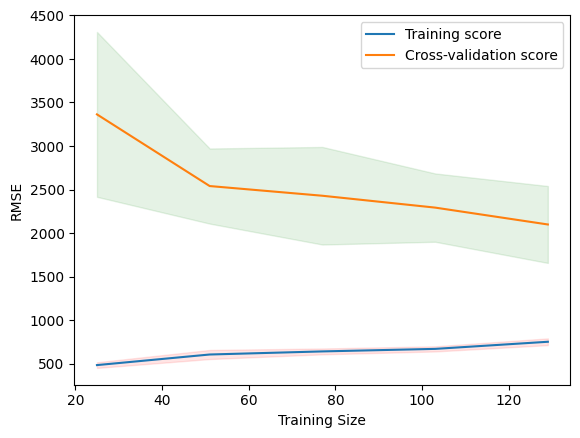

Meilleur parametre alpha pour Random Forest : {'random_forest__max_depth': 10, 'random_forest__min_samples_leaf': 1, 'random_forest__min_samples_split': 2, 'random_forest__n_estimators': 50}
Best score for Random Forest Regression : 0.8890287601208978


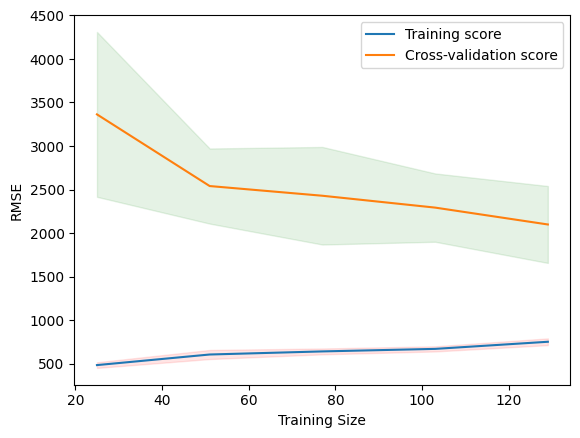

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import FunctionTransformer
from sklearn.ensemble import RandomForestRegressor

# Define X and y variables
y = df['prix']
X = df.drop(['prix'], axis=1)

categorial_features = ['etat_de_route', 'carburant','turbo','nombre_portes', 'type_vehicule', 'roues_motrices', 'emplacement_moteur','type_moteur', 'nombre_cylindres', 'systeme_carburant', 'marque', 'modèle']
numeric_features = ['empattement', 'longueur' , 'largeur','hauteur', 'poids_vehicule', 'taille_moteur', 'taux_alésage', 'course', 'taux_compression','chevaux','tour_moteur', 'consommation_ville', 'consommation_autoroute']

categorical_transformer = Pipeline(steps=[
    ('onehotencoder', OneHotEncoder(handle_unknown='ignore'))
])
# define the numeric transformer
numeric_transformer = Pipeline([
        ('min_max', MinMaxScaler()),  #StandardScaler():moyenne 0 et écart type = 1 -> Reg, SVM, PCA
        ('poly', PolynomialFeatures(degree=2, include_bias=False))
        ])


# use the ColumnTransformer to apply the appropriate transformers to each column
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorial_features)
])


# print(X.columns)
###############################################################################################
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
#############################################################################################"#

####### Ridge  #######

ridge_pipeline = Pipeline(steps=[ ('preprocessor', preprocessor),   ('ridge', Ridge()) ])

# Define a range of values for the alpha parameter
alpha_range = [0.0001,0.001, 0.01, 0.1, 1, 10, 100, 1000,10000]
# Perform grid search to find the best value of alpha
param_ridge = {'ridge__alpha': alpha_range}
ridge_grid = GridSearchCV(ridge_pipeline, param_ridge, cv=5, scoring= 'r2')#'neg_mean_squared_error')
ridge_grid.fit(X_train, y_train)
# ridge_grid.predict(X_test)
# ridge_grid.score(X_test, y_test)
# Print the best value of alpha and its corresponding mean squared error
print('Meilleur parametre alpha pour Ridge :', ridge_grid.best_params_['ridge__alpha'])
print("Best score for Ridge Regression :", ridge_grid.best_score_)
# print('Best mean squared error:', -ridge_grid.best_score_)

y_pred_ridge_best = ridge_grid.predict(X_test)
results_df_best = pd.DataFrame({"Ridge (Best)": y_pred_ridge_best,"Actual": y_test})
results_df_best['Ridge (Best)'] = results_df_best['Ridge (Best)'].apply(lambda x: round(x, 3))
results_df_best['Difference'] = results_df_best['Ridge (Best)'] - results_df_best['Actual']
results_df_best

######  Learning curve   ###############
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error

best_model_ridge = ridge_grid.best_estimator_

train_sizes, train_scores, test_scores = learning_curve(
    best_model_ridge, X_train, y_train,
    train_sizes=np.linspace(0.2, 1.0, 5), cv=5,
    scoring="neg_mean_squared_error",
)

train_scores_rmse = np.sqrt(-train_scores)
test_scores_rmse = np.sqrt(-test_scores)

plt.plot(train_sizes, np.mean(train_scores_rmse, axis=1), label="Training score")
plt.plot(train_sizes, np.mean(test_scores_rmse, axis=1), label="Cross-validation score")

plt.fill_between(train_sizes, np.mean(train_scores_rmse, axis=1) - np.std(train_scores_rmse, axis=1),
                 np.mean(train_scores_rmse, axis=1) + np.std(train_scores_rmse, axis=1), alpha=0.1, color="r")
plt.fill_between(train_sizes, np.mean(test_scores_rmse, axis=1) - np.std(test_scores_rmse, axis=1),
                 np.mean(test_scores_rmse, axis=1) + np.std(test_scores_rmse, axis=1), alpha=0.1, color="g")

plt.xlabel("Training Size")
plt.ylabel("RMSE")
plt.legend(loc="best")
plt.show()
# ################################################################""
####### Random Forest  #######

params_random_forest = {
    'random_forest__n_estimators': [50, 100, 200],
    'random_forest__max_depth': [None, 10, 20, 30],
    'random_forest__min_samples_split': [2, 5, 10],
    'random_forest__min_samples_leaf': [1, 2, 4],
    # 'random_forest__max_features': ['auto', 'sqrt', 'log2'],
}
# {
#     'random_forest__n_estimators': [10, 50, 100, 200],
#     'random_forest__max_depth': [3, 5, 7],
#     'random_forest__min_samples_split': [2, 5, 10],
# }

random_pipeline = Pipeline([
    ('preprocess', preprocessor),  # ajouter des étapes de prétraitement
    ('random_forest', RandomForestRegressor())
])
# Set up GridSearchCV to explore the hyperparameters
random_grid = GridSearchCV(random_pipeline, params_random_forest, cv=5)
random_grid.fit(X_train, y_train)

print('Meilleur parametre alpha pour Random Forest :', random_grid.best_params_)
print("Best score for Random Forest Regression :", random_grid.best_score_)

y_pred_forest_best = random_grid.predict(X_test)

######  Learning curve   ###############
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error

best_model_random = ridge_grid.best_estimator_

train_sizes, train_scores, test_scores = learning_curve(
    best_model_random, X_train, y_train,
    train_sizes=np.linspace(0.2, 1.0, 5), cv=5,
    scoring="neg_mean_squared_error",
)

train_scores_rmse = np.sqrt(-train_scores)
test_scores_rmse = np.sqrt(-test_scores)

plt.plot(train_sizes, np.mean(train_scores_rmse, axis=1), label="Training score")
plt.plot(train_sizes, np.mean(test_scores_rmse, axis=1), label="Cross-validation score")

plt.fill_between(train_sizes, np.mean(train_scores_rmse, axis=1) - np.std(train_scores_rmse, axis=1),
                 np.mean(train_scores_rmse, axis=1) + np.std(train_scores_rmse, axis=1), alpha=0.1, color="r")
plt.fill_between(train_sizes, np.mean(test_scores_rmse, axis=1) - np.std(test_scores_rmse, axis=1),
                 np.mean(test_scores_rmse, axis=1) + np.std(test_scores_rmse, axis=1), alpha=0.1, color="g")

plt.xlabel("Training Size")
plt.ylabel("RMSE")
plt.legend(loc="best")
plt.show()

# # # ###################################################
# # # # y_pred_lasso_best = lasso_grid.predict(X_test)


In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import FunctionTransformer

df = pd.read_csv('prix_voiture.csv')
# Define X and y variables
y = df['prix']
X = df.drop(['prix'], axis=1)

###############################################################################################
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
#############################################################################################"#

categorial_features = ['etat_de_route', 'carburant','turbo','nombre_portes', 'type_vehicule', 'roues_motrices', 'emplacement_moteur','type_moteur', 'nombre_cylindres', 'systeme_carburant', 'marque', 'modèle']
numeric_features = ['empattement', 'longueur' , 'largeur','hauteur', 'poids_vehicule', 'taille_moteur', 'taux_alésage', 'course', 'taux_compression','chevaux','tour_moteur', 'consommation_ville', 'consommation_autoroute']

categorical_transformer = Pipeline(steps=[
    ('onehotencoder', OneHotEncoder(handle_unknown='ignore'))
])
# define the numeric transformer
numeric_transformer = Pipeline([
        ('min_max', MinMaxScaler()),  #StandardScaler():moyenne 0 et écart type = 1 -> Reg, SVM, PCA
        ('poly', PolynomialFeatures(degree=2, include_bias=False))
        ])


# use the ColumnTransformer to apply the appropriate transformers to each column
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorial_features)
])


# print(X.columns)
###############################################################################################
# # Apply the preprocessor to the input data
# X_train_processed = preprocessor.fit_transform(X_train)
# X_test_processed = preprocessor.transform(X_test)

# Create the model with 100 trees
rf_model = RandomForestRegressor(n_estimators=100, max_depth=20, min_samples_split=2, min_samples_leaf=1)
# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_model.predict(X_test)

# Calculate the R^2 score on the test data
score = rf_model.score(X_test, y_test)

print(f"R^2 score: {score:.4f}")

######  Learning curve   ###############
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error

# best_model_random = ridge_grid.best_estimator_

train_sizes, train_scores, test_scores = learning_curve(
    rf_model, X_train, y_train,
    train_sizes=np.linspace(0.2, 1.0, 5), cv=5,
    scoring="neg_mean_squared_error",
)

train_scores_rmse = np.sqrt(-train_scores)
test_scores_rmse = np.sqrt(-test_scores)

plt.plot(train_sizes, np.mean(train_scores_rmse, axis=1), label="Training score")
plt.plot(train_sizes, np.mean(test_scores_rmse, axis=1), label="Cross-validation score")

plt.fill_between(train_sizes, np.mean(train_scores_rmse, axis=1) - np.std(train_scores_rmse, axis=1),
                 np.mean(train_scores_rmse, axis=1) + np.std(train_scores_rmse, axis=1), alpha=0.1, color="r")
plt.fill_between(train_sizes, np.mean(test_scores_rmse, axis=1) - np.std(test_scores_rmse, axis=1),
                 np.mean(test_scores_rmse, axis=1) + np.std(test_scores_rmse, axis=1), alpha=0.1, color="g")

plt.xlabel("Training Size")
plt.ylabel("RMSE")
plt.legend(loc="best")
plt.show()

ValueError: could not convert string to float: 'essence'

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import FunctionTransformer
from sklearn.ensemble import RandomForestRegressor

# Define X and y variables
y = df_top_vars['prix']
X = df_top_vars.drop(['prix'], axis=1)


# categorial_features2 = ['etat_de_route_1','systeme_carburant_2bbl','systeme_carburant_1bbl','turbo_atmosphérique','type_vehicule_berline compacte','roues_motrices_propulsion','roues_motrices_traction', 'emplacement_moteur_avant','type_moteur_ohc','nombre_cylindres_four','systeme_carburant_2bbl', 'marque_toyota'] 
# numeric_features2 = ['empattement','longueur' , 'largeur', 'poids_vehicule', 'taille_moteur', 'chevaux','consommation_autoroute', 'consommation_ville',]
# # categorial_features = ['etat_de_route', 'carburant','turbo','nombre_portes', 'type_vehicule', 'roues_motrices', 'emplacement_moteur','type_moteur', 'nombre_cylindres', 'systeme_carburant', 'marque', 'modèle']
# # numeric_features = ['empattement', 'longueur' , 'largeur','hauteur', 'poids_vehicule', 'taille_moteur', 'taux_alésage', 'course', 'taux_compression','chevaux','tour_moteur', 'consommation_ville', 'consommation_autoroute']
# categorical_transformer = Pipeline(steps=[
#     ('onehotencoder', OneHotEncoder(handle_unknown='ignore'))
# ])
# # define the numeric transformer
# numeric_transformer = Pipeline([
#         ('min_max', MinMaxScaler()),  #StandardScaler():moyenne 0 et écart type = 1 -> Reg, SVM, PCA
#         ('poly', PolynomialFeatures(degree=2, include_bias=False))
#         ])


# # use the ColumnTransformer to apply the appropriate transformers to each column
# preprocessor2 = ColumnTransformer(transformers=[
#     ('num', numeric_transformer, numeric_features2),
#     ('cat', categorical_transformer, categorial_features2)
# ])


# print(X.columns)
###############################################################################################
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
#############################################################################################"#
###############################################################################################
# Create the model with 100 trees
rf_model = RandomForestRegressor(n_estimators=100)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_model.predict(X_test)

# Calculate the R^2 score on the test data
score = rf_model.score(X_test, y_test)

print(f"R^2 score: {score:.4f}")

R^2 score: 0.9341


In [ ]:
# with open('nom_fichier.pkl', 'rb') as file:
#     model = pickle.load(file)
#     # code pour importer le modele depuis un fichier avec pickle

In [ ]:
X_test